The Ship Performance Dataset is a synthetic yet realistic collection of data designed to represent key operational metrics and attributes of various ship types in the Gulf of Guinea. This dataset is tailored for maritime data analytics enthusiasts, machine learning practitioners, and professionals interested in exploring clustering, prediction, and optimization problems in the maritime industry.

https://www.kaggle.com/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset


In this notebook the idea is to analyze the ship performance dataset using no supervised learning. The steps to follow are:


    - Check for nulls
    - Clean the dataset
    - Perform some visualization
    - Apply K-Means finding the optimal number of cluster with the elbow and silhoutte method
    - Visualize the clusters
    - Apply PCA and visualize again

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load dataset into 'df'
df = pd.read_csv("Ship_Performance_Dataset.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# Check df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [5]:
# Check how the dataset is distributed
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [6]:
# Check for nulls
df.isnull().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

In [7]:
# In this case I'm going to fill the null values with the mode as everyr missing data belongs to a categorical column
categorical_columns = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1764\2551072886.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
# Check if nulls have been filled correctly
df.isnull().sum()

Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

In [ ]:
# Other ways to fill null values
# df.fillna(df.mean())
# df.fillna(df.median())
# df.fillna(df.mode())
# df.fillna(df.ffill())
# df.fillna(df.bfill())

<Axes: >

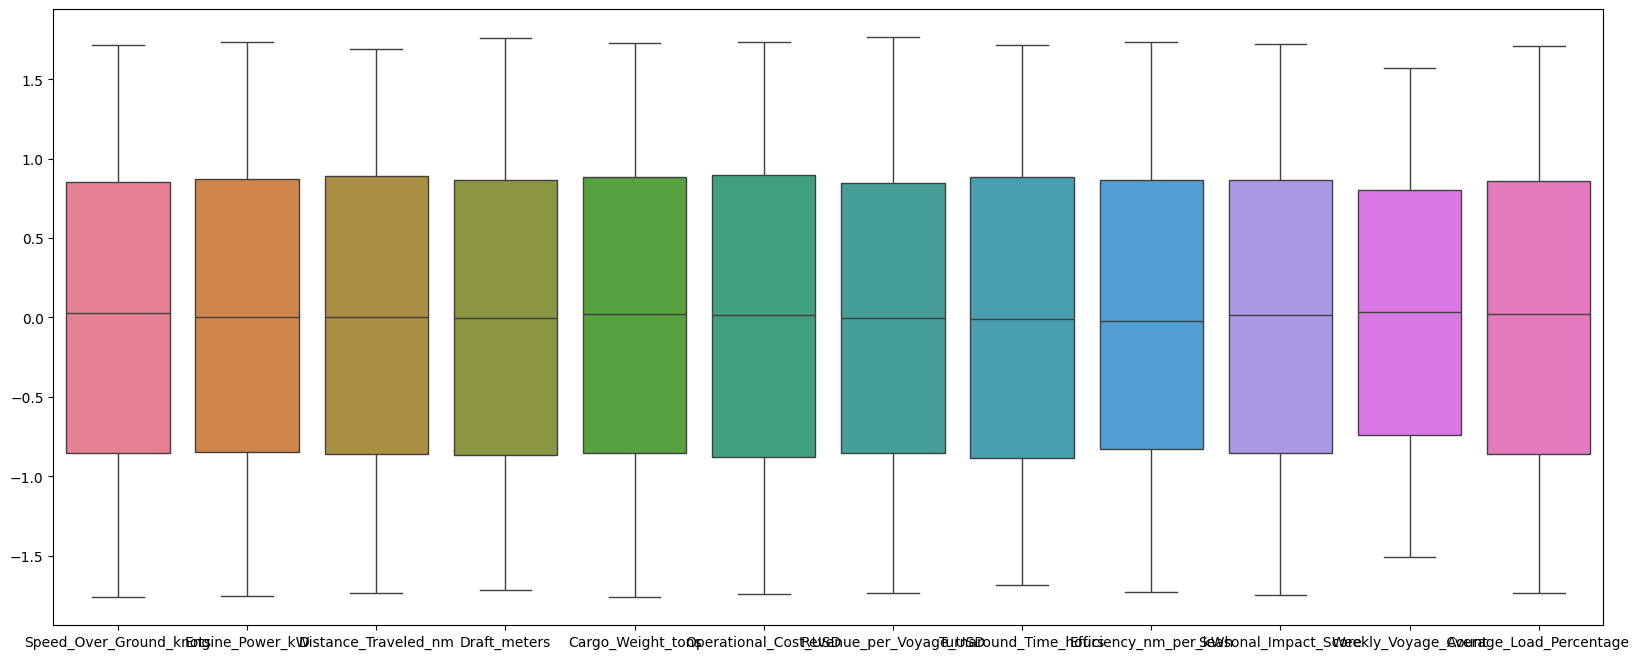

In [22]:
# Let's check for outliers
plt.figure(figsize=(20, 8)) 
sns.boxplot(data=df.select_dtypes(include=['number']))

In [ ]:
""" In this case we can see there are no outliers in the dataset, but in case we had them we could remove them using the following code:"""

# In case we have outliers...
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Other way to remove outliers is to clip them:
# df = df.clip(lower=df.quantile(0.05), upper=df.quantile(0.95), axis=1)

# We could also use the RobustScaler to scale the data as it's more robust to outliers
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# df = scaler.fit_transform(df)


## Data preprocessing

In [10]:
# Drop 'date' column as it's not useful

df.drop(columns=['Date'], inplace=True)

In [13]:
# One hot encoding for categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [17]:
# Data scaling using StandardScaler - We could also use MinMaxScaler idf we wanted to scale the data between a specific range

# I make this process to only select the numerical columns in the dataset to scale them, otherwise the scaler will throw an error
scaler = StandardScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))

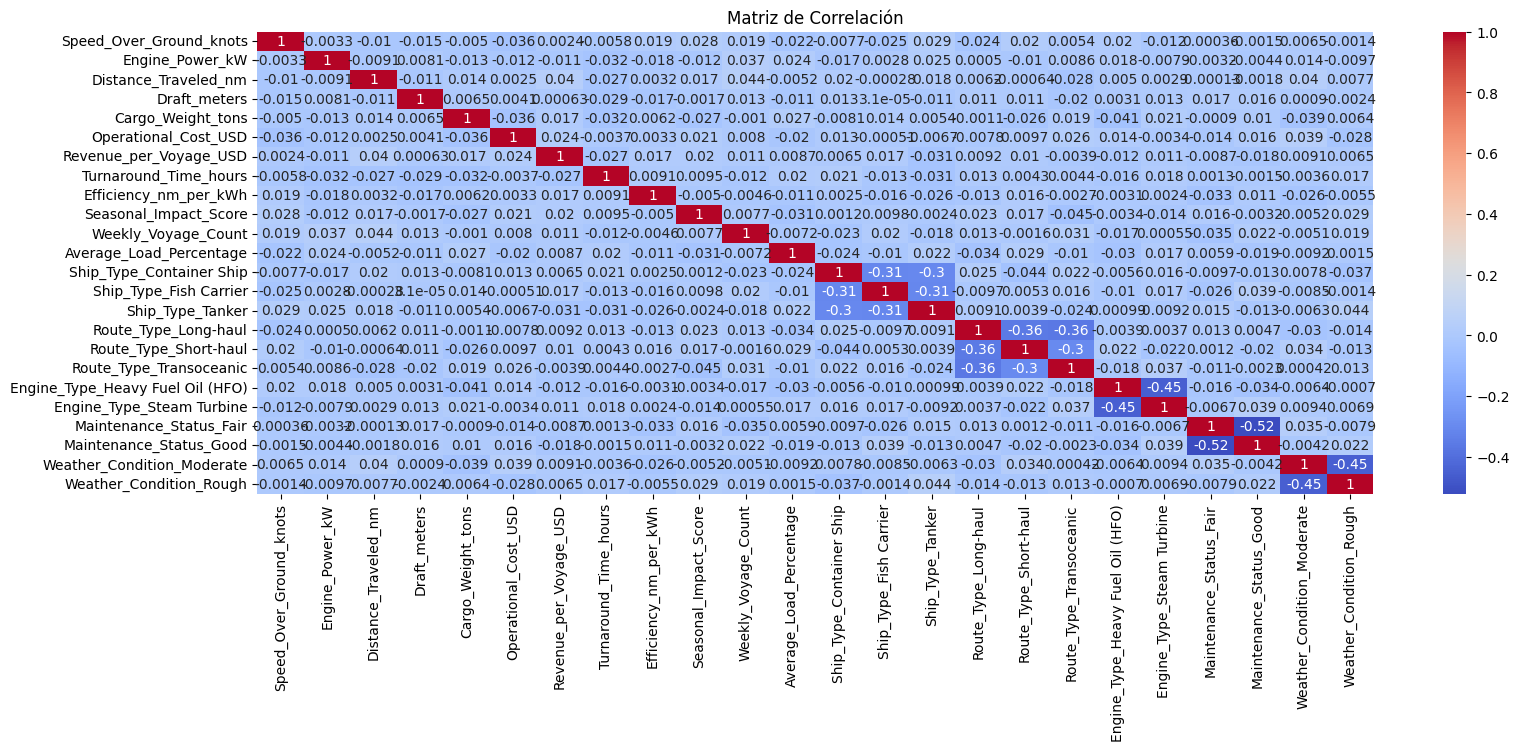

In [18]:
# EDA - Exploratory Data Analysis
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Correlation matrix
plt.title("Matriz de Correlación")
plt.show()

<Figure size 1200x600 with 0 Axes>

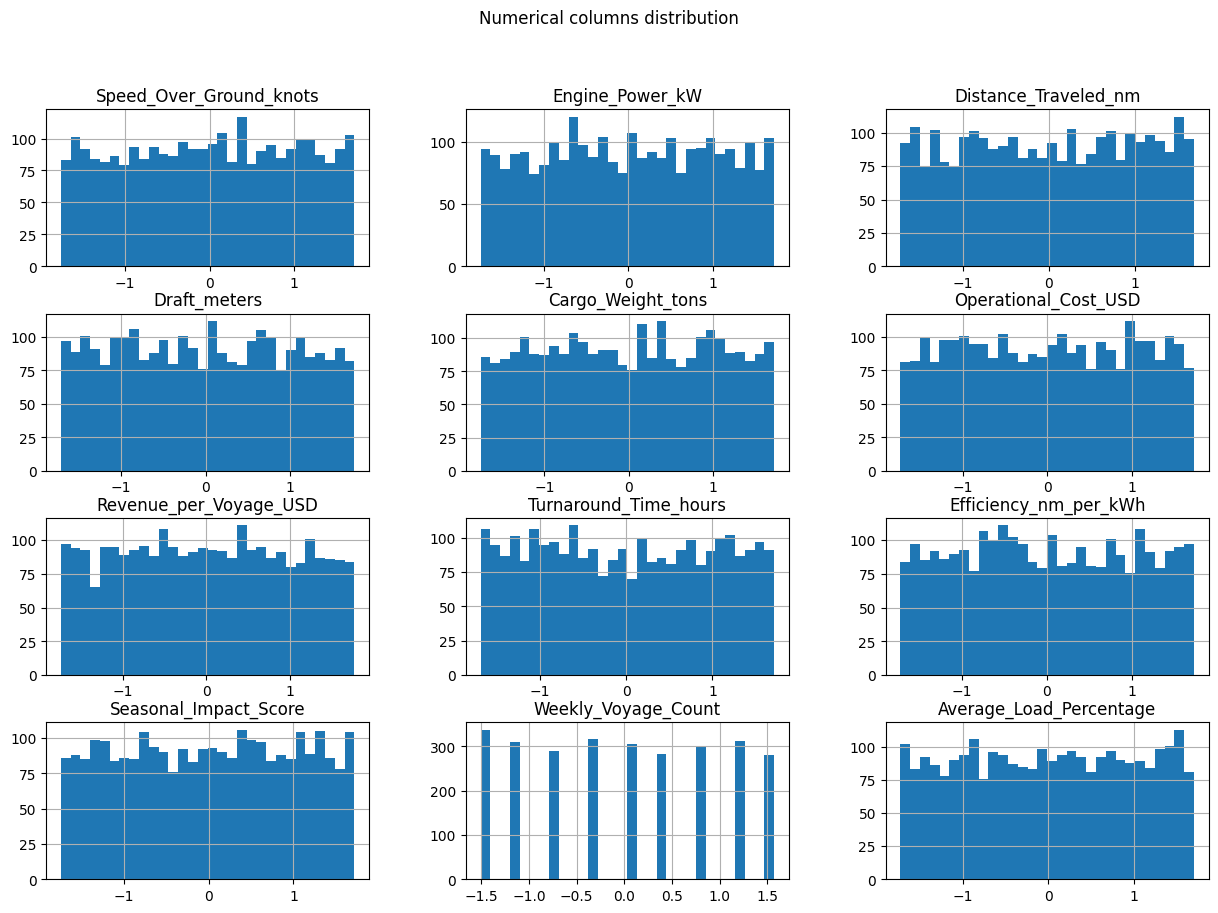

In [20]:
# Numerical cols distribution
plt.figure(figsize=(12,6))
df.select_dtypes(include=['number']).hist(bins=30, figsize=(15,10))
plt.suptitle("Numerical columns distribution")
plt.show()

## Clustering with K-Means

In [25]:
# Let's try to find the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Try different numbers of clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

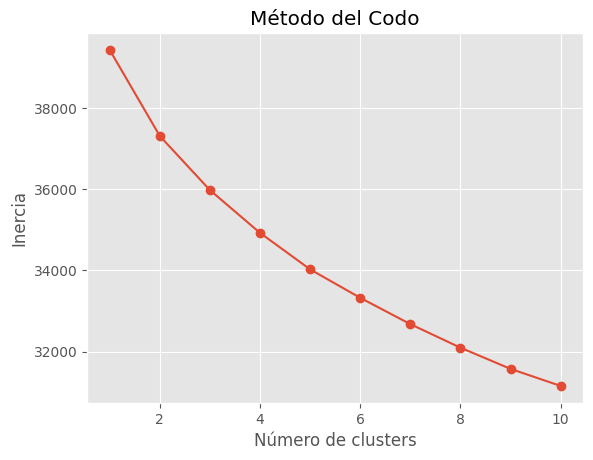

In [59]:
# Plot the Elbow to identify the optimal number of clusters
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

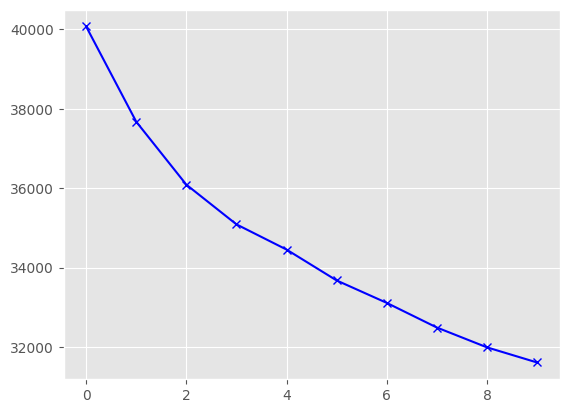

In [ ]:
# Another way to apply the Elbow Method
clusters_n = []

range_values = range(1, 11)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    clusters_n.append(kmeans.inertia_)

plt.plot(clusters_n, 'bx-')
plt.style.use('ggplot')
plt.show()

In [60]:
# Let's try to find the optimal number of clusters using the Silhouette Score
best_k = 0  # Default value
best_score = -1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f"K={k}, Silhouette Score={score}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"Optimal number of clusters using Silhouette Score: {best_k}")


K=2, Silhouette Score=0.0597893026899874
K=3, Silhouette Score=0.05516376573626286
K=4, Silhouette Score=0.0511782284215599
K=5, Silhouette Score=0.04881227328643963
K=6, Silhouette Score=0.048881479151776826
K=7, Silhouette Score=0.0478916671393598
K=8, Silhouette Score=0.04689557282498733
K=9, Silhouette Score=0.04753733844350597
K=10, Silhouette Score=0.049287146284413726
Optimal number of clusters using Silhouette Score: 2


In [61]:
# Let's fit the model with the best number of clusters
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(df)
labels = kmeans.predict(df)
df['Cluster'] = labels

In [62]:
df.head()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,...,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Maintenance_Status_Fair,Maintenance_Status_Good,Weather_Condition_Moderate,Weather_Condition_Rough,Cluster
0,-1.161003,0.425980,-0.009608,1.461520,1.658525,1.623465,-0.845173,-0.900768,1.627007,1.429008,...,True,False,False,True,False,False,False,True,False,1
1,-1.673617,0.053631,0.042355,1.642611,-1.557798,1.620311,1.336484,1.219556,-1.259663,-0.410025,...,False,True,False,False,True,False,True,False,True,1
2,0.729934,-0.152125,-0.664052,-0.949214,-1.529788,1.372949,-0.469621,0.435091,-0.741138,1.394864,...,True,False,False,False,False,True,False,True,False,0
3,0.800762,-1.175035,0.159036,0.646741,1.261758,0.044058,-1.599821,-1.096910,-0.237289,1.273042,...,False,False,True,False,True,True,False,True,False,0
4,-0.895364,-0.931672,0.719182,-0.069985,-1.381999,0.231250,0.570727,1.271175,1.320115,-1.458833,...,False,False,True,False,False,True,False,True,False,0


In [63]:
kmeans.cluster_centers_

array([[ 0.03423571, -0.04864817, -0.24294406, -0.11418038,  0.05392998,
        -0.25743191, -0.18752718,  0.43299085, -0.03824707, -0.11947025,
        -0.25474331,  0.13746123,  0.23294407,  0.2292563 ,  0.23601721,
         0.29870928,  0.22679779,  0.23110018,  0.30424093,  0.3079287 ,
         0.33128457,  0.35894284,  0.31776275,  0.30301168,  0.98770744],
       [-0.05022678,  0.07137112,  0.35642018,  0.1675126 , -0.07911999,
         0.37767513,  0.27511878, -0.63523546,  0.05611179,  0.17527331,
         0.37373072, -0.20166765,  0.23083859,  0.25247971,  0.23354373,
         0.30297565,  0.23174031,  0.23624887,  0.32281335,  0.31920649,
         0.29576195,  0.38322813,  0.33724076,  0.29125338,  0.09918846]])

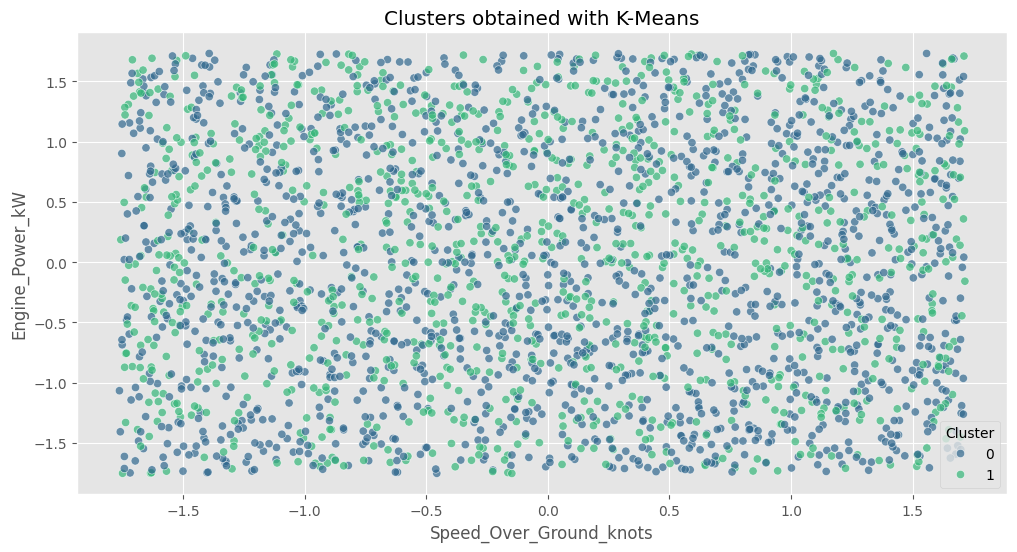

In [64]:
# Visualization of the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df.iloc[:, 0], y = df.iloc[:, 1], hue = df['Cluster'], palette='viridis', alpha=0.7)
plt.title('Clusters obtained with K-Means')
plt.show()

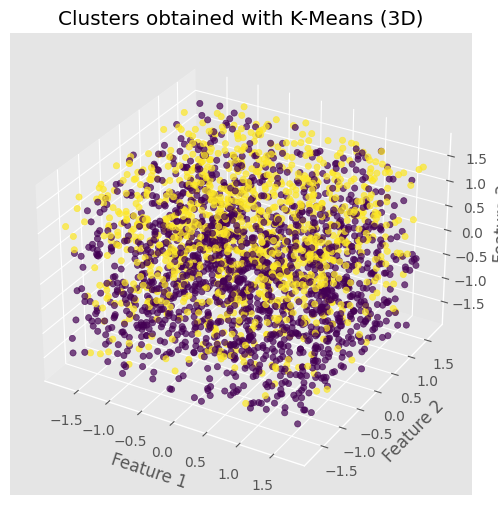

In [65]:
# 3D visualization to see if we can see things more clearly

from mpl_toolkits.mplot3d import Axes3D

# Selecciona tres características para la visualización en 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de datos en 3D
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=df['Cluster'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.title('Clusters obtained with K-Means (3D)')
plt.show()

## PCA

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['Cluster']))

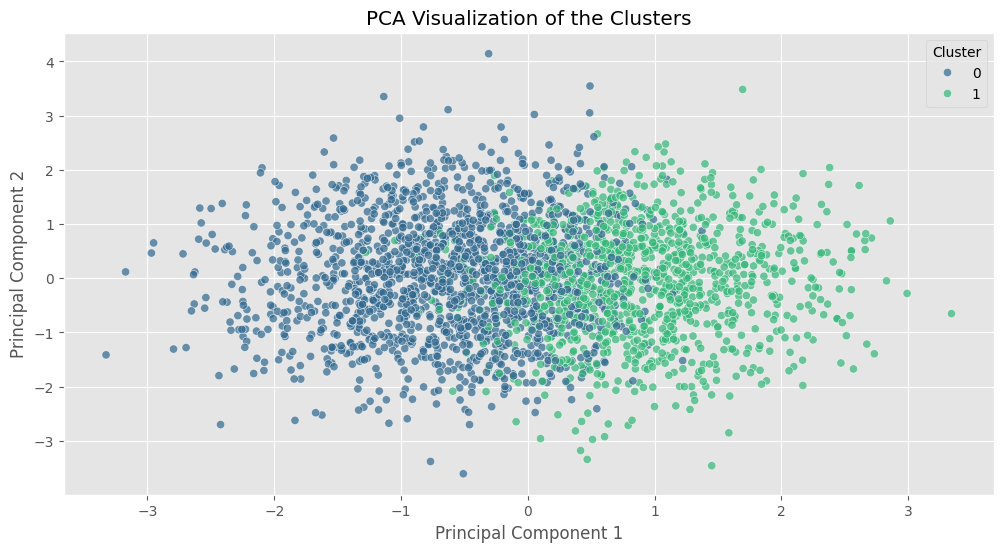

In [67]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title("PCA Visualization of the Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()